In [86]:
import pandas as pd
df = pd.read_csv("1_boston_housing.csv")



In [88]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)



In [90]:
print(f"\nTraining features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")


    


Training features shape: (354, 13)
Testing features shape: (152, 13)
Training target shape: (354, 1)
Testing target shape: (152, 1)


In [92]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)



In [94]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()




C:\Users\Pratik\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose = 1)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 613.8549 - mae: 22.6812 - val_loss: 601.4512 - val_mae: 22.5914
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 557.2688 - mae: 21.6778 - val_loss: 548.8713 - val_mae: 21.3644
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 467.8614 - mae: 19.6014 - val_loss: 467.6952 - val_mae: 19.2929
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 379.4706 - mae: 17.1900 - val_loss: 354.2202 - val_mae: 15.8932
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 271.7074 - mae: 13.5148 - val_loss: 229.7035 - val_mae: 11.7059
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 183.4001 - mae: 10.7156 - val_loss: 149.2409 - val_mae: 8.5180
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 144.6349 - mae: 9.4479 - val_loss: 127.5258 - val_mae: 8.1772
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 124.7555 - mae: 8.6514 - val_loss: 117.8313 - val_mae: 7.7839
Epoch 9/100
11/11 ━━

In [80]:

print("\nEvaluating the model on test data...")
mse_nn, mae_nn = model.evaluate(X_test, y_test, verbose=0) # verbose=0 to not show progress bar during evaluation

print(f'\nMean squared error on test data: {mse_nn:.2f}')
print(f'Mean absolute error on test data: {mae_nn:.2f}')







Evaluating the model on test data...

Mean squared error on test data: 81.10
Mean absolute error on test data: 6.61


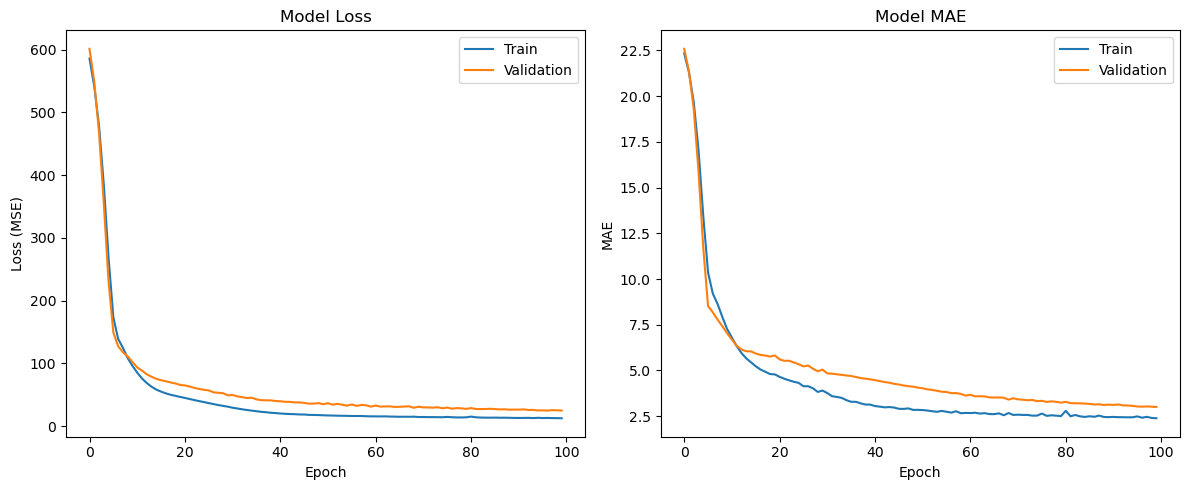

In [97]:
import matplotlib.pyplot as plt
# --- 7. Visualize Training History ---
# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation MAE values
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()


In [100]:
# --- 8. Make Sample Predictions ---
# Make predictions on the first few samples from the scaled test set
num_samples_to_predict = 10
sample_predictions = model.predict(X_test[:num_samples_to_predict])

print(f"\nSample Predictions (first {num_samples_to_predict} test samples):")
# Convert y_test (which is a DataFrame/Series) to numpy array for easier indexing
y_test_array = y_test.values.flatten() # Use .values to get numpy array, .flatten() to make it 1D

for i in range(num_samples_to_predict):
    # sample_predictions is a 2D array, so access prediction using [i][0]
    print(f"Sample {i+1}: Actual = {y_test_array[i]:.2f}, Predicted = {sample_predictions[i][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step

Sample Predictions (first 10 test samples):
Sample 1: Actual = 15.00, Predicted = 12.32
Sample 2: Actual = 26.60, Predicted = 27.34
Sample 3: Actual = 45.40, Predicted = 43.56
Sample 4: Actual = 20.80, Predicted = 15.49
Sample 5: Actual = 34.90, Predicted = 29.10
Sample 6: Actual = 21.90, Predicted = 43.96
Sample 7: Actual = 28.70, Predicted = 25.62
Sample 8: Actual = 7.20, Predicted = 11.19
Sample 9: Actual = 20.00, Predicted = 15.18
Sample 10: Actual = 32.20, Predicted = 30.44
